In [55]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import os
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import linregress
import statsmodels.stats.multicomp as multi

In [56]:
df = pd.read_excel('classifier.xlsx')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 16 columns):
Unnamed: 0         1260 non-null int64
type               1260 non-null int64
number             1260 non-null int64
condition          1260 non-null int64
question_number    1260 non-null int64
subid              1260 non-null int64
index              1260 non-null int64
word_token         1260 non-null int64
word               1260 non-null object
response_time      1260 non-null int64
RT_pre             1260 non-null int64
RT_noun            1260 non-null int64
cloze              1260 non-null float64
Unnamed: 8         1259 non-null object
Unnamed: 9         1260 non-null object
Unnamed: 10        0 non-null float64
dtypes: float64(2), int64(11), object(3)
memory usage: 157.6+ KB


In [65]:
#eliminate the trials with response time longer than 1000ms
a = ((df['response_time'] < 1000) & (df['response_time'] > 100)&(df['RT_pre'] < 1000)&(df['RT_pre'] > 100)&(df['RT_noun'] < 1000) & (df['RT_noun'] > 100))
df_eliminated = df[a]
df_eliminated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1259
Data columns (total 16 columns):
Unnamed: 0         990 non-null int64
type               990 non-null int64
number             990 non-null int64
condition          990 non-null int64
question_number    990 non-null int64
subid              990 non-null int64
index              990 non-null int64
word_token         990 non-null int64
word               990 non-null object
response_time      990 non-null int64
RT_pre             990 non-null int64
RT_noun            990 non-null int64
cloze              990 non-null float64
Unnamed: 8         989 non-null object
Unnamed: 9         990 non-null object
Unnamed: 10        0 non-null float64
dtypes: float64(2), int64(11), object(3)
memory usage: 131.5+ KB


In [4]:
#average the response time by sentences 
average_RT = df_eliminated['response_time'].groupby(df_eliminated['number']).mean()
df_average = pd.DataFrame(data = average_RT)
average_RT_pre = df_eliminated['RT_pre'].groupby(df_eliminated['number']).mean()
average_RT_noun = df_eliminated['RT_noun'].groupby(df_eliminated['number']).mean()
average_cloze = df_eliminated['cloze'].groupby(df_eliminated['number']).mean()
df_average['RT_pre'] = average_RT_pre
df_average['RT_noun'] = average_RT_noun
df_average['cloze'] = average_cloze

In [60]:
df_cloze = df_average

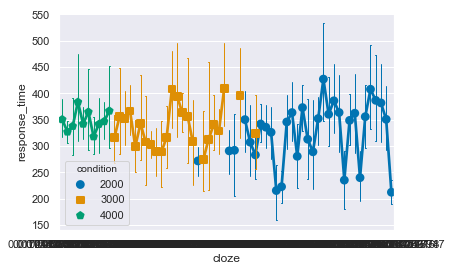

In [7]:

sns.set()
sns.pointplot(data=df_eliminated, x='cloze', y='response_time', hue='condition', dodge=True, markers=['o', 's','p'],
      capsize=.1, errwidth=1, palette='colorblind')


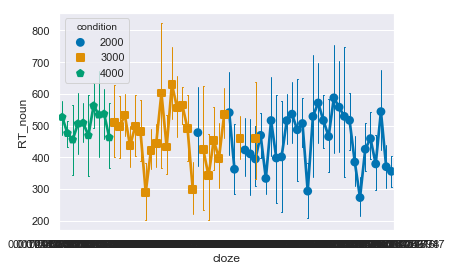

In [8]:
sns.set()
sns.pointplot(data=df_eliminated, x='cloze', y='RT_noun', hue='condition', dodge=True, markers=['o', 's','p'],
      capsize=.1, errwidth=1, palette='colorblind')

In [9]:
#divided into three conditions
df_high = df_eliminated[df_eliminated['condition'] == 2000]
df_mid = df_eliminated[df_eliminated['condition'] == 3000]
df_low = df_eliminated[df_eliminated['condition'] == 4000]


In [10]:
def anova(a,b,c):
    print(a.mean(),b.mean(),c.mean())
    F, p = stats.f_oneway(a,b,c)
    print(F, p)
    return F,p

In [11]:
def posthoc(a,b):
    test = multi.MultiComparison(a,b)
    res = test.tukeyhsd()
    return(res.summary())

In [12]:
#anova for stimuli
anova(df_high['cloze'],df_mid['cloze'],df_low['cloze'])
posthoc(df_eliminated['cloze'],df_eliminated['condition'])

0.5112951250128714 0.1361878069500574 0.019347826214460746
2249.652077722176 0.0


group1,group2,meandiff,lower,upper,reject
2000,3000,-0.3751,-0.3931,-0.3571,True
2000,4000,-0.4919,-0.51,-0.4739,True
3000,4000,-0.1168,-0.1352,-0.0985,True


In [13]:
#anova for noun
anova(df_high['RT_noun'], df_mid['RT_noun'], df_low['RT_noun'])
posthoc(df_eliminated['RT_noun'],df_eliminated['condition'])

459.6057971014493 476.23692307692306 506.771875
4.644564074297574 0.009824813133281275


group1,group2,meandiff,lower,upper,reject
2000,3000,16.6311,-19.9402,53.2025,False
2000,4000,47.1661,10.4479,83.8843,True
3000,4000,30.535,-6.7229,67.7928,False


In [14]:
anova(df_high['RT_pre'], df_mid['RT_pre'], df_low['RT_pre'])
posthoc(df_eliminated['RT_pre'], df_eliminated['condition'])

348.92753623188406 333.71076923076924 324.44375
3.013406564605762 0.04957623842076284


group1,group2,meandiff,lower,upper,reject
2000,3000,-15.2168,-38.833,8.3995,False
2000,4000,-24.4838,-48.1949,-0.7727,True
3000,4000,-9.267,-33.3266,14.7926,False


In [15]:
#anova for classifier response time
anova(df_high['response_time'], df_mid['response_time'], df_low['response_time'])
posthoc(df_eliminated['response_time'], df_eliminated['condition'])

344.7855072463768 343.0953846153846 342.01875
0.0408296416499193 0.9599942801393327


group1,group2,meandiff,lower,upper,reject
2000,3000,-1.6901,-24.5748,21.1945,False
2000,4000,-2.7668,-25.7433,20.2098,False
3000,4000,-1.0766,-24.3909,22.2376,False


In [16]:
print(df_cloze.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1001 to 3036
Data columns (total 4 columns):
response_time    108 non-null float64
RT_pre           108 non-null float64
RT_noun          108 non-null float64
cloze            108 non-null float64
dtypes: float64(4)
memory usage: 4.2 KB
None


In [17]:
def linreg(dep_variable):
    return (linregress((df_cloze['cloze']*100).apply(np.log), dep_variable))

In [18]:
linreg(df_cloze['RT_pre'].values)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2445: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [19]:
linreg(df_cloze['RT_noun'].values)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [20]:
linreg(df_cloze['response_time'].apply(np.log).values)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [78]:
#draw regression plot
def regfig(dep_variable):
    fig = sns.regplot(df_cloze['cloze'].values,dep_variable,fit_reg=True)
    plt.xlabel('Cloze',size = 14)
    plt.ylabel('Response Time (ms)', size = 14)
    #plt.title("Classifier", size = 20)

Text(0.5, 1.0, 'Classifier')

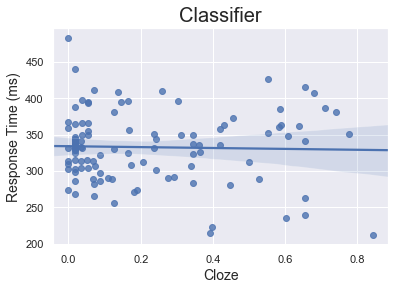

In [79]:
regfig(df_cloze['response_time'].values)
plt.title("Classifier", size = 20)

Text(0.5, 1.0, 'Pre-Classifier')

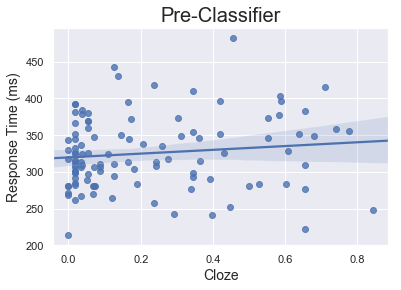

In [23]:
regfig(df_cloze['RT_pre'].values)
plt.title("Pre-Classifier", size = 20)

Text(0.5, 1.0, 'Noun')

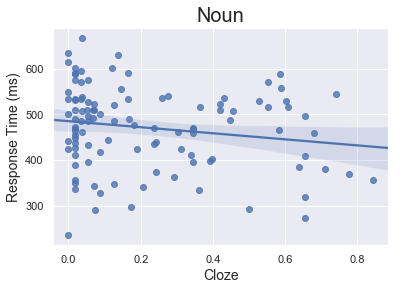

In [80]:
regfig(df_cloze['RT_noun'].values)

plt.title("Noun", size = 20)

In [61]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

#mixed linear effect models

md = smf.mixedlm("response_time ~ cloze", df_cloze, groups=df_cloze["cloze"])

mdf = md.fit()

print(mdf.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.frame

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: response_time
No. Observations: 108     Method:             REML         
No. Groups:       78      Scale:              2352.9876    
Min. group size:  1       Likelihood:         -565.1247    
Max. group size:  8       Converged:          No           
Mean group size:  1.4                                      
-----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     334.019    6.438 51.881 0.000 321.400 346.637
cloze          -6.141   20.084 -0.306 0.760 -45.505  33.223
Group Var       1.539                                      



In [63]:
md = smf.mixedlm("RT_noun ~ cloze", df_cloze, groups = df_cloze['cloze'])

mdf = md.fit()

print(mdf.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: RT_noun  
No. Observations:  108     Method:             REML     
No. Groups:        78      Scale:              7535.0514
Min. group size:   1       Likelihood:         -626.7765
Max. group size:   8       Converged:          No       
Mean group size:   1.4                                  
--------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------
Intercept 485.313    9.555 50.794 0.000  466.587 504.040
cloze     -66.376   32.503 -2.042 0.041 -130.080  -2.672
Group Var   0.000                                       



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Pyth

In [27]:
md = smf.mixedlm("RT_pre ~ cloze", df_cloze, groups = df_cloze['cloze'])

mdf = md.fit()

print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: RT_pre   
No. Observations: 108     Method:             REML     
No. Groups:       78      Scale:              1840.0540
Min. group size:  1       Likelihood:         -565.0615
Max. group size:  8       Converged:          Yes      
Mean group size:  1.4                                  
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 324.445    8.002 40.545 0.000 308.761 340.129
cloze      15.273   22.859  0.668 0.504 -29.530  60.076
Group Var 584.156   17.761                             



In [28]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

#mixed linear effect models

df_log = df_cloze['cloze'].apply(np.log)

df_log = pd.concat([df_log, df_cloze['response_time']], axis=1)

md = smf.mixedlm("response_time ~ cloze", df_log, groups=df_cloze["cloze"])

mdf = md.fit()

print(mdf.summary())

MissingDataError: exog contains inf or nans

In [ ]:
df_log = df_cloze['cloze'].apply(np.log)

dat1 = pd.concat([df_log, df_cloze['response_time']], axis=1)
print(dat1)

In [ ]:
df3 = df_cloze['cloze']*100
df3.apply(np.log)

In [30]:
print(df_eliminated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1259
Data columns (total 15 columns):
Unnamed: 0         990 non-null int64
type               990 non-null int64
number             990 non-null int64
condition          990 non-null int64
question_number    990 non-null int64
index              990 non-null int64
word_token         990 non-null int64
word               990 non-null object
response_time      990 non-null int64
RT_pre             990 non-null int64
RT_noun            990 non-null int64
cloze              990 non-null float64
Unnamed: 8         989 non-null object
Unnamed: 9         990 non-null object
Unnamed: 10        0 non-null float64
dtypes: float64(2), int64(10), object(3)
memory usage: 163.8+ KB
None


In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf



md = smf.mixedlm("response_time ~ cloze", df_eliminated, groups=df_eliminated["condition"])

mdf = md.fit()

print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: response_time
No. Observations: 990     Method:             REML         
No. Groups:       3       Scale:              15763.4704   
Min. group size:  320     Likelihood:         -6183.9952   
Max. group size:  345     Converged:          Yes          
Mean group size:  330.0                                    
-----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     321.304   18.113 17.739 0.000 285.803 356.805
cloze          98.752   46.897  2.106 0.035   6.835 190.668
Group Var     611.591    7.155                             



In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# construct our model, with our county now shown as a group
md = smf.mixedlm("response_time ~ cloze", df_eliminated, groups=df_eliminated["subid"])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: response_time
No. Observations: 990     Method:             REML         
No. Groups:       35      Scale:              8534.7075    
Min. group size:  6       Likelihood:         -5938.0901   
Max. group size:  36      Converged:          Yes          
Mean group size:  28.3                                     
-----------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     359.514   17.519 20.521 0.000 325.177 393.850
cloze           7.456   12.637  0.590 0.555 -17.312  32.223
Group Var   10075.949   28.713                             



In [86]:
md = smf.mixedlm("RT_pre ~ cloze", df_eliminated, groups=df_eliminated[["subid",'cloze']])
mdf = md.fit()
print(mdf.summary())

TypeError: unhashable type: 'numpy.ndarray'

In [85]:
md = smf.mixedlm("RT_noun ~ cloze", df_eliminated, groups=df_eliminated[["subid",'cloze']])
mdf = md.fit()
print(mdf.summary())

TypeError: unhashable type: 'numpy.ndarray'